In [6]:
import numpy as np

def tridiagonal_matrix(n, possible_vals):
  gen_vals = lambda n: np.random.choice(possible_vals, n)
  main_diag = gen_vals(n)
  lower_diag = gen_vals(n-1)
  upper_diag = gen_vals(n-1)
  matrix = np.diag(main_diag) + np.diag(lower_diag, k=-1) + np.diag(upper_diag, k=1)
  return matrix

tridiagonal_matrix(n=5, possible_vals=(0,1,2))

array([[1, 2, 0, 0, 0],
       [1, 2, 2, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 1]])

In [169]:
def stacked_matrix(n):
  top_left = 3 * np.ones((n,n))
  top_right = np.fromfunction(lambda _,j: j+1, (n,n), dtype=int)
  vertical_separator = np.zeros((n,1))
  top = np.hstack((top_left, vertical_separator, top_right))
  bottom_left = np.fromfunction(lambda i,j: (i+j)%2==0, (n,n), dtype=int)
  bottom_right = 2 * np.fromfunction(lambda i,j: ((i+j)%2==0) & (i!=j), (n,n), dtype=int)
  bottom = np.hstack((bottom_left, vertical_separator, bottom_right))
  horizontal_separator = np.zeros((1,2*n+1))
  matrix = np.vstack((top, horizontal_separator, bottom))
  return matrix

stacked_matrix(n=5)

array([[3., 3., 3., 3., 3., 0., 1., 2., 3., 4., 5.],
       [3., 3., 3., 3., 3., 0., 1., 2., 3., 4., 5.],
       [3., 3., 3., 3., 3., 0., 1., 2., 3., 4., 5.],
       [3., 3., 3., 3., 3., 0., 1., 2., 3., 4., 5.],
       [3., 3., 3., 3., 3., 0., 1., 2., 3., 4., 5.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 0., 2., 0., 2.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 2., 0.],
       [1., 0., 1., 0., 1., 0., 2., 0., 0., 0., 2.],
       [0., 1., 0., 1., 0., 0., 0., 2., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 2., 0., 2., 0., 0.]])

In [10]:
import time

get_current_time_seconds = lambda: time.time()

def time_it(func):
  def inner_func(*args, **kwargs):
    start_seconds = get_current_time_seconds()
    result = func(*args, **kwargs)
    end_seconds = get_current_time_seconds()
    time_taken_seconds = end_seconds - start_seconds
    last_arg_index = len(args) - 1
    if last_arg_index >= 0 and hasattr(args[last_arg_index], "__name__"):
      last_arg = args[last_arg_index].__name__
    else:
      last_arg = "void"
    print(f"{func.__name__} ({last_arg}) time taken: {time_taken_seconds}")
    return result
  return inner_func

@time_it
def manually_multiply(A, B, array_mult_func):
  n = A.shape[0]
  m = B.shape[1]
  C = np.empty((n,m))
  for i in range(n):
    for j in range(m):
      C[i,j] = array_mult_func(A[i], B[:,j])
  return C

def array_mult(a, b):
  sum = 0
  for i in range(a.shape[0]):
      sum += a[i] * b[i]
  return sum

def optimized_array_mult(a, b):
  return np.dot(a, b)

@time_it
def np_matrix_mult(A, B):
  return np.matmul(A, B)

def random_matrix(n, m , zero_to=10):
  return np.random.randint(0, zero_to, (n, m))

A = tridiagonal_matrix(n=5, possible_vals=(0,1,2))
B = random_matrix(n=5, m=4, zero_to=10)

print(f"A = \n{A}")
print(f"B = \n{B}")
C = manually_multiply(A, B, array_mult)
print(f"AB = \n{C}")
D = manually_multiply(A, B, optimized_array_mult)
arrays_are_equal = ((C == D) & (D == np_matrix_mult(A, B))).all()
print(f"All AB operations are equal: {arrays_are_equal}")

A = 
[[2 0 0 0 0]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 1 2 0]
 [0 0 0 0 2]]
B = 
[[3 5 0 8]
 [4 1 8 0]
 [4 8 8 9]
 [9 7 2 2]
 [6 0 3 4]]
manually_multiply (array_mult) time taken: 0.0
AB = 
[[ 6. 10.  0. 16.]
 [ 0.  0.  0.  0.]
 [ 4.  8.  8.  9.]
 [22. 22. 12. 13.]
 [12.  0.  6.  8.]]
manually_multiply (optimized_array_mult) time taken: 0.0008192062377929688
np_matrix_mult (void) time taken: 0.0
All AB operations are equal: True


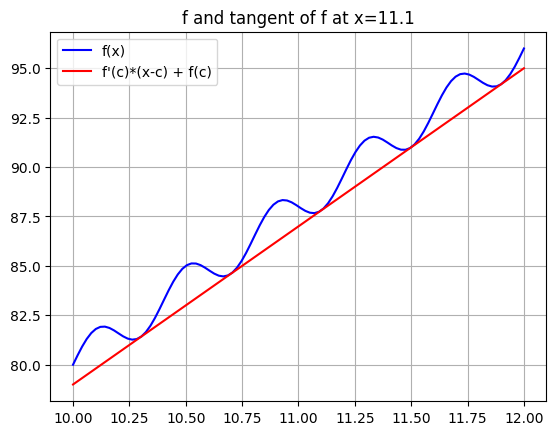

In [9]:
import matplotlib.pyplot as plt
import numpy as np

A = len("Ignas")
B = len("Jogminas")
f = lambda x: np.sin(A*np.pi*x) + B*x 
f_ = lambda x: A*np.pi*np.cos(A*np.pi*x) + B

def plot_with_tangent(f, a, b, c):
  x = np.linspace(a, b, 100)
  y = f(x)
  plt.plot(x, y, c="blue")
  y = f_(c)*(x-c) + f(c)
  plt.plot(x, y, c="red")
  plt.legend(["f(x)", "f'(c)*(x-c) + f(c)"])
  plt.grid()
  plt.title(f"f and tangent of f at x={c}")
  plt.show()

plot_with_tangent(f, a=10, b=12, c=11.1)



In [8]:
def get_unevens(arr):
  return arr[arr % 2 != 0]

def zerofy_negatives(arr):
  return np.where(arr < 0, 0, arr)

def get_distances(A, B):
  return ((A - B)**2).sum(axis=0)**0.5

def get_bigger_than_left_count(arr):
  return (arr[1:] > arr[:-1]).sum()

def get_sign_change_count(arr):
  return (arr < 0).sum()

np.set_printoptions(precision=2, suppress=True)

n = 10
arr = np.random.randint(-10, 10, n)
A = np.random.randint(0, 10, (3, n))
B = np.random.randint(0, 10, (3, n))
print(f"arr = \n{arr}")
print(f"A = \n{A}")
print(f"B = \n{B}")
print(f"Uneven elements of arr =\n{get_unevens(arr)}")
print(f"Zerofied negatives of arr = \n{zerofy_negatives(arr)}")
print(f"Distances between A and B = \n{get_distances(A, B)}")
print(f"Bigger than left of arr = \n{get_bigger_than_left_count(arr)}")
print(f"Sign changes of arr = \n{get_sign_change_count(arr)}")

arr = 
[-2  5 -8  7  6 -4  4  7 -2  5]
A = 
[[5 9 2 3 1 8 0 2 0 3]
 [1 8 4 9 7 6 7 1 6 8]
 [6 6 8 8 7 5 0 3 4 3]]
B = 
[[1 8 2 9 5 6 3 6 7 5]
 [6 0 1 5 7 6 0 6 4 4]
 [5 7 6 4 5 5 7 6 1 6]]
Uneven elements of arr =
[5 7 7 5]
Zerofied negatives of arr = 
[0 5 0 7 6 0 4 7 0 5]
Distances between A and B = 
[ 6.48  8.12  3.61  8.25  4.47  2.   10.34  7.07  7.87  5.39]
Bigger than left of arr = 
5
Sign changes of arr = 
4
